# Mapping the residue distribution of pathogenic missense variants in disordered regions

In [6]:
import os
import sys

# Add the parent directory of "notebooks" to Python's search path
sys.path.append(os.path.abspath(".."))

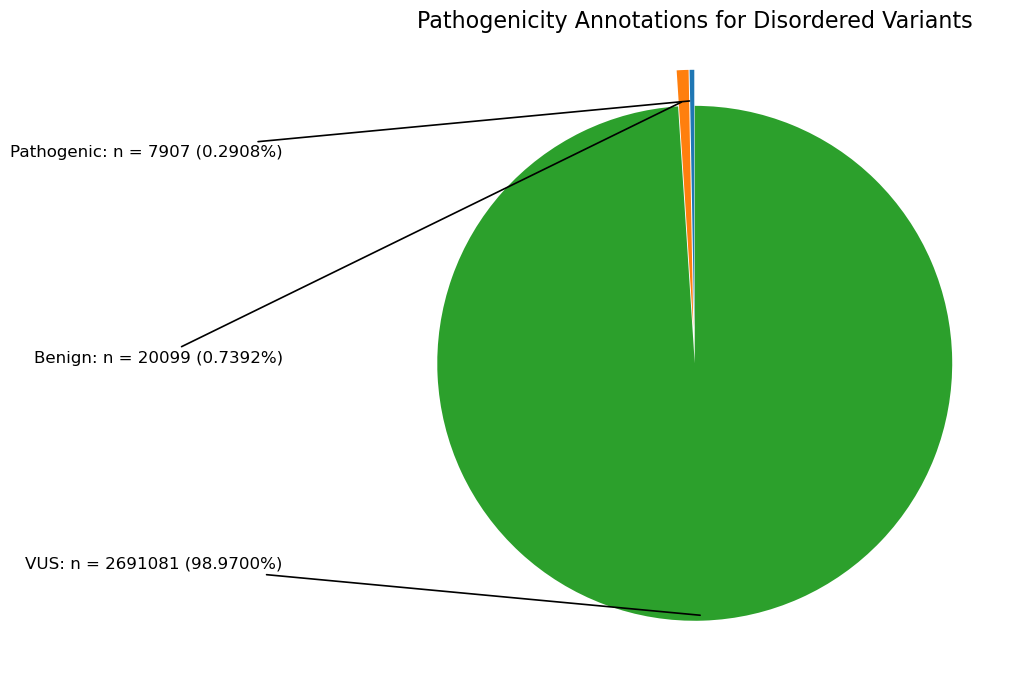

In [1]:
# Computing fraction of disordered and folded mutations assigned to each pathogenicity category

disordered_pathogenic = 7907
disordered_benign = 20099
disordered_VUS = 2691081
folded_pathogenic = 54434
folded_benign = 79931
folded_VUS = 4828800

### import os
### from protein import Protein
### >>> for UniProt_ID in os.listdir('/neuhaus/eytan/DisVar_protein_data'):
### ...     protein = Protein(file_path = os.path.join('/neuhaus/eytan/DisVar_protein_data', UniProt_ID))
### ...     for variant in protein.missense_variants['disordered']:
### ...             if protein.missense_variants['disordered'][variant] in ['benign', 'likely_benign']:
### ...                     disordered_benign += 1
### ...             elif protein.missense_variants['disordered'][variant] in ['pathogenic', 'likely pathogenic']:
### ...                     disordered_pathogenic += 1
### ...             else:
### ...                     disordered_VUS += 1
### ...     for variant in protein.missense_variants['folded']:
### ...             if protein.missense_variants['folded'][variant] in ['benign', 'likely benign']:
### ...                     folded_benign += 1
### ...             elif protein.missense_variants['folded'][variant] in ['pathogenic', 'likely pathogenic']:
### ...                     folded_pathogenic += 1
### ...             else:
### ...                     folded_VUS += 1

import matplotlib.pyplot as plt
import numpy as np

labels = ["Pathogenic", "Benign", "VUS"]
counts = [7907, 20099, 2691081]
total = sum(counts)
label_texts = [
    f"{lbl}: n = {cnt} ({cnt/total*100:.4f}%)"
    for lbl, cnt in zip(labels, counts)
]
fig, ax = plt.subplots(figsize=(10, 7))
explode = [0.12, 0.12, 0.02]
wedges, _ = ax.pie(
    counts,
    explode=explode,
    startangle=90
)
right_y_positions = np.linspace(0.8, -0.8, 3)
left_y_positions = np.linspace(0.8, -0.8, 3)
right_i = 0
left_i = 0
for wedge, text in zip(wedges, label_texts):
    angle = 0.5 * (wedge.theta1 + wedge.theta2)
    rad = np.deg2rad(angle)
    x = np.cos(rad)
    y = np.sin(rad)
    right_side = -90 <= angle <= 90
    if right_side:
        y_text = right_y_positions[right_i]
        x_text = 1.6
        ha = "left"
        right_i += 1
    else:
        y_text = left_y_positions[left_i]
        x_text = -1.6
        ha = "right"
        left_i += 1
    ax.annotate(
        text,
        xy=(x, y),
        xytext=(x_text, y_text),
        ha=ha,
        va="center",
        fontsize=12,
        arrowprops=dict(arrowstyle="-", lw=1.2)
    )
plt.title("Pathogenicity Annotations for Disordered Variants", fontsize=16)
plt.tight_layout()
plt.show()

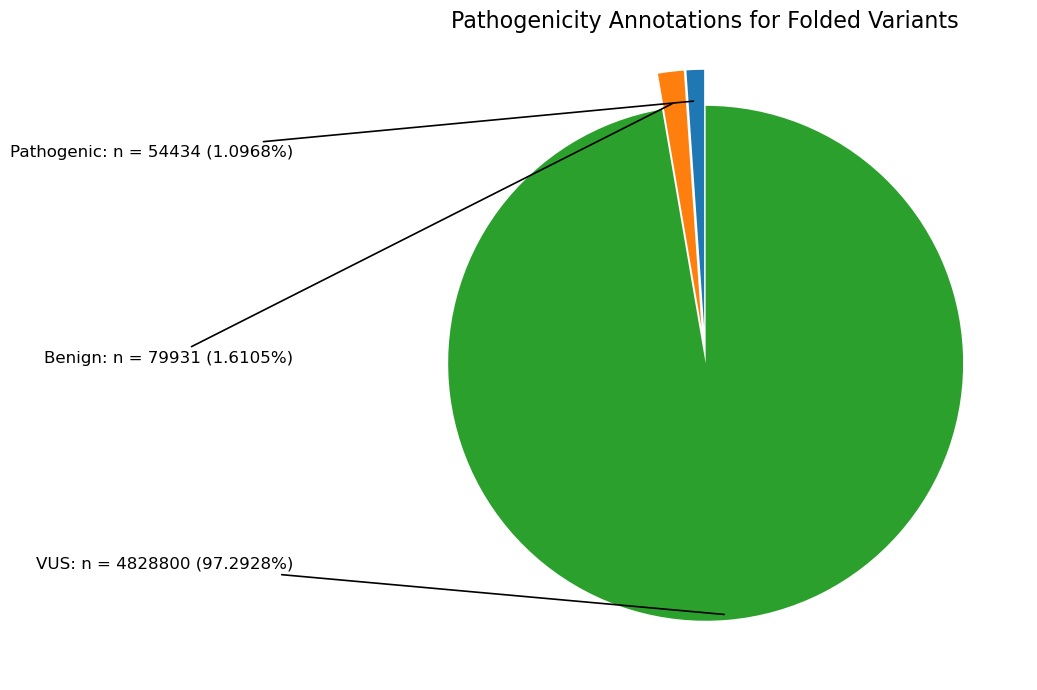

In [2]:

labels = ["Pathogenic", "Benign", "VUS"]
counts = [54434, 79931, 4828800]
total = sum(counts)
label_texts = [
    f"{lbl}: n = {cnt} ({cnt/total*100:.4f}%)"
    for lbl, cnt in zip(labels, counts)
]
fig, ax = plt.subplots(figsize=(10, 7))
explode = [0.12, 0.12, 0.02]
wedges, _ = ax.pie(
    counts,
    explode=explode,
    startangle=90
)
right_y_positions = np.linspace(0.8, -0.8, 3)
left_y_positions = np.linspace(0.8, -0.8, 3)
right_i = 0
left_i = 0
for wedge, text in zip(wedges, label_texts):
    angle = 0.5 * (wedge.theta1 + wedge.theta2)
    rad = np.deg2rad(angle)
    x = np.cos(rad)
    y = np.sin(rad)
    right_side = -90 <= angle <= 90
    if right_side:
        y_text = right_y_positions[right_i]
        x_text = 1.6
        ha = "left"
        right_i += 1
    else:
        y_text = left_y_positions[left_i]
        x_text = -1.6
        ha = "right"
        left_i += 1
    ax.annotate(
        text,
        xy=(x, y),
        xytext=(x_text, y_text),
        ha=ha,
        va="center",
        fontsize=12,
        arrowprops=dict(arrowstyle="-", lw=1.2)
    )
plt.title("Pathogenicity Annotations for Folded Variants", fontsize=16)
plt.tight_layout()
plt.show()

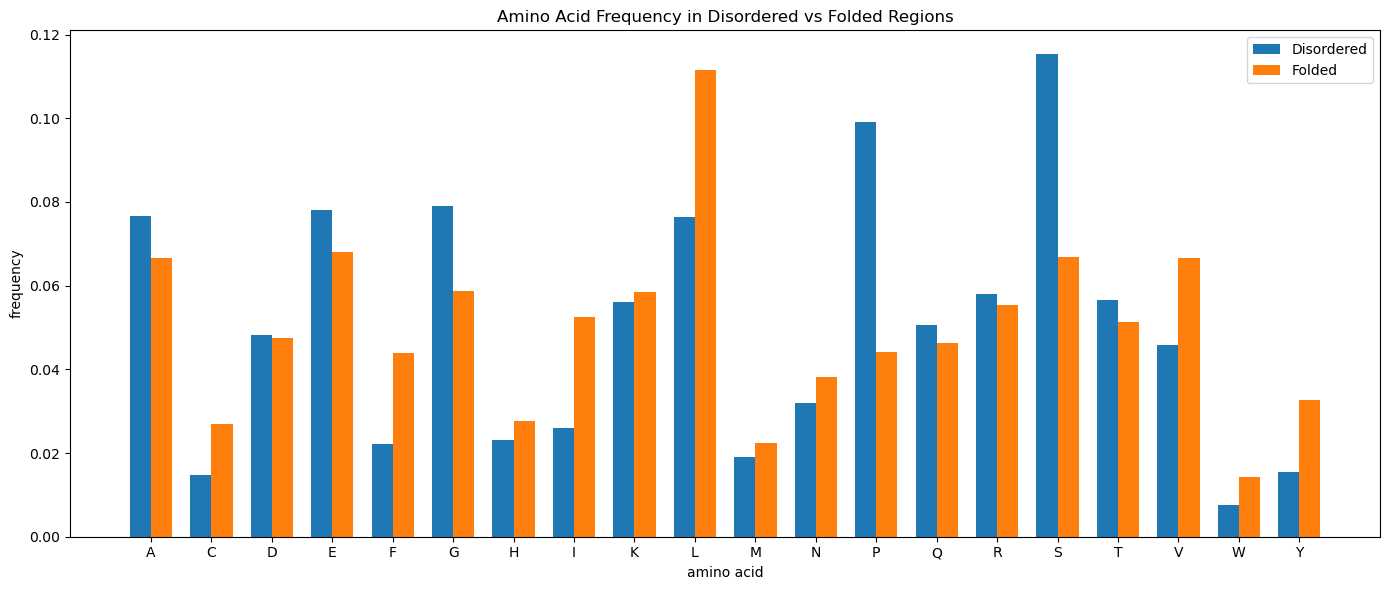

In [3]:
# Computing residue abundance for disordered and folded regions

### >>> import os
### >>> proteome_dir = '/neuhaus/eytan/DisVar_protein_data'
### >>> from protein import Protein
### >>> for UniProt_ID in os.listdir(proteome_dir):
### ...     protein = Protein(file_path = os.path.join(proteome_dir, UniProt_ID))
### >>> disordered_aa = ''
### >>> folded_aa = ''
### >>> for UniProt_ID in os.listdir(proteome_dir):
### ...     protein = Protein(file_path = os.path.join(proteome_dir, UniProt_ID))
### ...     disordered_nt = [(start, end) for start, end in protein.disordered_regions]
### ...     for start, end in disordered_nt:
### ...             disordered_aa += protein.aa_sequence[start : end]
### ...     prev_end = 0
### ...     for start, end in disordered_nt:
### ...             if start > prev_end:
### ...                     folded_aa += protein.aa_sequence[prev_end : start]
### ...             prev_end = end
### ...     if prev_end < len(protein.aa_sequence):
### ...             folded_aa += protein.aa_sequence[prev_end : ]
### ... 
### >>> len(disordered_aa)
### 3670428
### >>> len(folded_aa)
### 7249747
### >>> from collections import Counter
### >>> def letter_fractions(s):
### ...     counts = Counter(s)
### ...     total = len(s)
### ...     return {char: count / total for char, count in counts.items()}
### >>> disordered_aa_fractions = letter_fractions(disordered_aa) 
### >>> folded_aa_fractions = letter_fractions(folded_aa) 

disordered_aa_fractions = {'M': 0.019112212526713506, 'A': 0.0767125795683773, 'D': 0.04827856587842072, 'T': 0.05656370319755625, 'P': 0.09918461825160445, 'N': 0.03203713572368127, 'G': 0.0790733396759179, 'Q': 0.05049356641786734, 'V': 0.045750522827310604, 'F': 0.022157361484818665, 'L': 0.07644394604661908, 'C': 0.014754137664599333, 'I': 0.02588362991999843, 'H': 0.02317440908798647, 'R': 0.05811311378400557, 'Y': 0.015405015436891828, 'K': 0.05600382298740093, 'S': 0.11524214614753375, 'E': 0.07810179085381869, 'W': 0.007514382518877908}
folded_aa_fractions = {'M': 0.022509475158236557, 'T': 0.0513022040631211, 'N': 0.03808105303536799, 'K': 0.058547422413499396, 'L': 0.11149064925989831, 'D': 0.047390205478894644, 'A': 0.06671819030374439, 'W': 0.014324499875650832, 'S': 0.0668904721778567, 'R': 0.05536220781221745, 'F': 0.04390842880448104, 'V': 0.066689499647367, 'Y': 0.03255534296576142, 'C': 0.027010597749135244, 'P': 0.04419519743240695, 'G': 0.05861445923561195, 'H': 0.027751037381028607, 'E': 0.06804720219891812, 'Q': 0.04620671590332739, 'I': 0.05240513910347492}
aa_order = sorted(disordered_aa_fractions.keys())
disordered_values = [disordered_aa_fractions[aa] for aa in aa_order]
folded_values = [folded_aa_fractions[aa] for aa in aa_order]
x = np.arange(len(aa_order))
width = 0.35
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(x - width/2, disordered_values, width, label='Disordered')
ax.bar(x + width/2, folded_values, width, label='Folded')
ax.set_xticks(x)
ax.set_xticklabels(aa_order)
ax.set_xlabel('amino acid')
ax.set_ylabel('frequency')
ax.set_title('Amino Acid Frequency in Disordered vs Folded Regions')
ax.legend()
plt.tight_layout()
plt.show()